In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

!pip install xgboost
!pip install imbalanced-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
df = pd.read_csv('/content/MD_managed_bodyfat.csv')
data = df.drop(columns=['Unnamed: 0'])
data.head()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
0,1.0708,23.0,154.25,67.75,36.2,93.100000,85.2,94.500000,59.0,37.3,21.9,32.000000,28.238743,17.1,12.3
1,1.0853,22.0,173.25,72.25,38.5,95.695554,83.0,98.700000,58.7,37.3,23.4,30.500000,28.900000,18.2,6.1
2,1.0414,22.0,154.00,66.25,34.0,95.800000,87.9,99.200000,59.6,38.9,24.0,28.800000,27.150830,16.6,25.3
3,1.0751,26.0,184.75,72.25,37.4,101.800000,86.4,100.040854,60.1,37.3,22.8,33.187769,29.400000,18.2,10.4
4,1.0340,24.0,184.25,71.25,34.4,97.300000,100.0,101.900000,63.2,42.2,24.0,32.200000,27.700000,17.7,28.7


In [5]:
data['BodyFat'].value_counts()

20.4    4
25.8    3
23.6    3
14.9    3
16.5    3
       ..
31.4    1
18.8    1
18.5    1
13.5    1
31.9    1
Name: BodyFat, Length: 176, dtype: int64

# Predict with imbalance data

In [6]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
y


array([12.3,  6.1, 25.3, 10.4, 28.7, 20.9, 19.2, 12.4,  4.1, 11.7,  7.1,
        7.8, 20.8, 21.2, 22.1, 20.9, 29. , 22.9, 16. , 16.5, 19.1, 15.2,
       15.6, 17.7, 14. ,  3.7,  7.9, 22.9,  3.7,  8.8, 11.9,  5.7, 11.8,
       21.3, 32.3, 40.1, 24.2, 28.4, 35.2, 32.6, 34.5, 32.9, 31.6, 32. ,
        7.7, 13.9, 10.8,  5.6, 13.6,  4. , 10.2,  6.6,  8. ,  6.3,  3.9,
       22.6, 20.4, 28. , 31.5, 24.6, 26.1, 29.8, 30.7, 25.8, 32.3, 30. ,
       21.5, 13.8,  6.3, 12.9, 24.3,  8.8,  8.5, 13.5, 11.8, 18.5,  8.8,
       22.2, 21.5, 18.8, 31.4, 26.8, 18.4, 27. , 27. , 26.6, 14.9, 23.1,
        8.3, 14.1, 20.5, 18.2,  8.5, 24.9,  9. , 17.4,  9.6, 11.3, 17.8,
       22.2, 21.2, 20.4, 20.1, 22.3, 25.4, 18. , 19.3, 18.3, 17.3, 21.4,
       19.7, 28. , 22.1, 21.3, 26.7, 16.7, 20.1, 13.9, 25.8, 18.1, 27.9,
       25.3, 14.7, 16. , 13.8, 17.5, 27.2, 17.4, 20.8, 14.9, 18.1, 22.7,
       23.6, 26.1, 24.4, 27.1, 21.8, 29.4, 22.4, 20.4, 24.9, 18.3, 23.3,
        9.4, 10.3, 14.2, 19.2, 29.6,  5.3, 25.2,  9

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))
print(x_scaled.shape, y_scaled.shape)
y_scaled

(252, 14) (252, 1)


array([[0.25894737],
       [0.12842105],
       [0.53263158],
       [0.21894737],
       [0.60421053],
       [0.44      ],
       [0.40421053],
       [0.26105263],
       [0.08631579],
       [0.24631579],
       [0.14947368],
       [0.16421053],
       [0.43789474],
       [0.44631579],
       [0.46526316],
       [0.44      ],
       [0.61052632],
       [0.48210526],
       [0.33684211],
       [0.34736842],
       [0.40210526],
       [0.32      ],
       [0.32842105],
       [0.37263158],
       [0.29473684],
       [0.07789474],
       [0.16631579],
       [0.48210526],
       [0.07789474],
       [0.18526316],
       [0.25052632],
       [0.12      ],
       [0.24842105],
       [0.44842105],
       [0.68      ],
       [0.84421053],
       [0.50947368],
       [0.59789474],
       [0.74105263],
       [0.68631579],
       [0.72631579],
       [0.69263158],
       [0.66526316],
       [0.67368421],
       [0.16210526],
       [0.29263158],
       [0.22736842],
       [0.117

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.3, random_state=3)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((176, 14), (176, 1), (76, 14), (76, 1))

In [9]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [10]:
pred = model.predict(x_test)

In [11]:
rmse = math.sqrt(mean_squared_error(y_test,pred))
print('Root Means Squared Error when predict with imbalanced data: ', rmse)

Root Means Squared Error when predict with imbalanced data:  0.02899305865706231


# Handling Imbalance data


## 0: Clustering data base on range of bodyfat

In [12]:
data_handling = data[:]
data_handling

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
0,1.07080,23.0,154.25,67.75,36.2,93.100000,85.2,94.500000,59.0,37.300000,21.9,32.000000,28.238743,17.100000,12.3
1,1.08530,22.0,173.25,72.25,38.5,95.695554,83.0,98.700000,58.7,37.300000,23.4,30.500000,28.900000,18.200000,6.1
2,1.04140,22.0,154.00,66.25,34.0,95.800000,87.9,99.200000,59.6,38.900000,24.0,28.800000,27.150830,16.600000,25.3
3,1.07510,26.0,184.75,72.25,37.4,101.800000,86.4,100.040854,60.1,37.300000,22.8,33.187769,29.400000,18.200000,10.4
4,1.03400,24.0,184.25,71.25,34.4,97.300000,100.0,101.900000,63.2,42.200000,24.0,32.200000,27.700000,17.700000,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.07409,70.0,134.25,67.00,34.9,89.200000,83.6,88.800000,49.6,34.800000,21.5,25.600000,25.700000,18.500000,11.0
248,1.02360,72.0,201.00,69.75,40.9,108.500000,105.0,104.500000,59.6,40.800000,23.2,35.200000,28.600000,20.100000,33.6
249,1.03280,72.0,186.75,66.00,38.9,111.100000,111.5,101.700000,60.3,37.300000,21.5,31.300000,27.200000,18.442059,29.3
250,1.03990,72.0,190.75,70.50,38.9,108.101661,101.3,97.800000,56.0,39.321092,22.7,30.500000,29.400000,19.800000,26.0


In [13]:
arr = data['BodyFat']
print(max(arr))

cl = []
for val in arr:
    if 0 < val <= 10:
        cl.append(0)
    elif 10 < val <= 20:
        cl.append(1)
    elif 20 < val <= 30:
        cl.append(2)
    elif 30 < val <= 40:
        cl.append(3)
    else:
        cl.append(4)
        
print(cl)

47.5
[1, 0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 1, 2, 3, 4, 2, 2, 3, 3, 3, 3, 3, 3, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 2, 2, 1, 3, 2, 1, 2, 2, 2, 1, 2, 0, 1, 2, 1, 0, 2, 0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 2, 1, 3, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 3, 1, 0, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 4, 1, 1, 1, 0, 2, 2, 2, 2, 1, 3, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2, 2, 0, 3, 1, 3, 3, 0, 1, 0, 2, 1, 1, 1, 4, 1, 0, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 3, 3, 3, 2, 1, 3, 1, 3, 2, 2, 3]


In [14]:
# create new dataframe with feature "Class"
data_handling['Class'] = cl
data_handling.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat,Class
0,1.0708,23.0,154.25,67.75,36.2,93.100000,85.2,94.500000,59.0,37.3,21.9,32.000000,28.238743,17.1,12.3,1
1,1.0853,22.0,173.25,72.25,38.5,95.695554,83.0,98.700000,58.7,37.3,23.4,30.500000,28.900000,18.2,6.1,0
2,1.0414,22.0,154.00,66.25,34.0,95.800000,87.9,99.200000,59.6,38.9,24.0,28.800000,27.150830,16.6,25.3,2
3,1.0751,26.0,184.75,72.25,37.4,101.800000,86.4,100.040854,60.1,37.3,22.8,33.187769,29.400000,18.2,10.4,1
4,1.0340,24.0,184.25,71.25,34.4,97.300000,100.0,101.900000,63.2,42.2,24.0,32.200000,27.700000,17.7,28.7,2


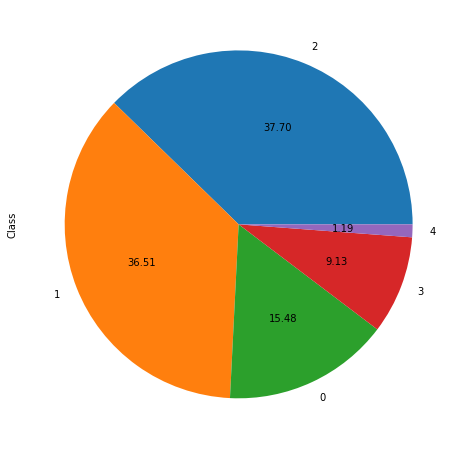

In [15]:
c = data_handling['Class']
c.value_counts().plot.pie(figsize = (8, 8), autopct="%.2f")

In [16]:
d = data_handling.drop(columns=['Class'])
c.shape, d.shape

((252,), (252, 15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdce6944b10>]],
      dtype=object)

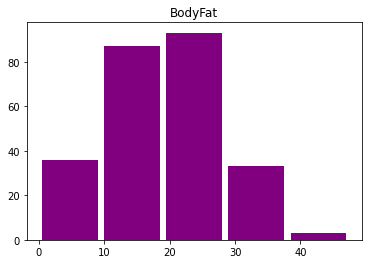

In [17]:
data.hist(column='BodyFat', bins=5, grid=False, rwidth=.9, color='purple')

## 1: Oversamping

### a: RandomOversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state= 3)
d_ros, c_ros = ros.fit_resample(d, c)
d_ros.shape, c_ros.shape

((475, 15), (475,))

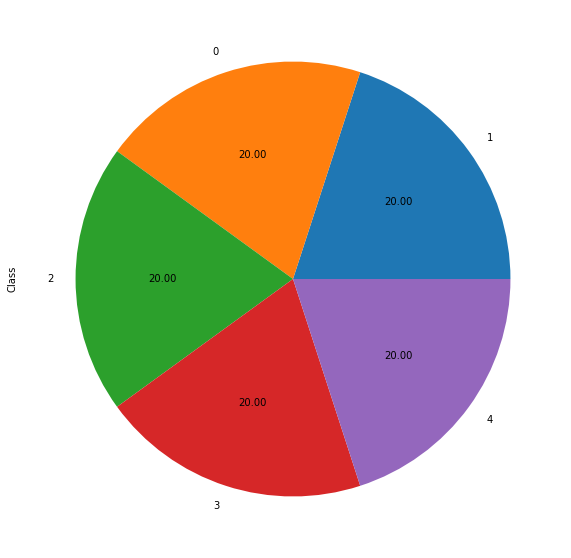

In [ ]:
c_ros.value_counts().plot.pie(figsize = (10, 10), autopct="%.2f")

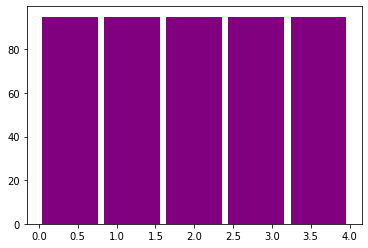

In [ ]:
c_ros.hist(bins=5, grid=False, rwidth=.9, color='purple')

In [ ]:
x_ros = d_ros.iloc[:, :-1].values
y_ros = d_ros.iloc[:, -1].values
print(x_ros.shape, y_ros.shape)
y_ros

(475, 14) (475,)


array([12.3,  6.1, 25.3, 10.4, 28.7, 20.9, 19.2, 12.4,  4.1, 11.7,  7.1,
        7.8, 20.8, 21.2, 22.1, 20.9, 29. , 22.9, 16. , 16.5, 19.1, 15.2,
       15.6, 17.7, 14. ,  3.7,  7.9, 22.9,  3.7,  8.8, 11.9,  5.7, 11.8,
       21.3, 32.3, 40.1, 24.2, 28.4, 35.2, 32.6, 34.5, 32.9, 31.6, 32. ,
        7.7, 13.9, 10.8,  5.6, 13.6,  4. , 10.2,  6.6,  8. ,  6.3,  3.9,
       22.6, 20.4, 28. , 31.5, 24.6, 26.1, 29.8, 30.7, 25.8, 32.3, 30. ,
       21.5, 13.8,  6.3, 12.9, 24.3,  8.8,  8.5, 13.5, 11.8, 18.5,  8.8,
       22.2, 21.5, 18.8, 31.4, 26.8, 18.4, 27. , 27. , 26.6, 14.9, 23.1,
        8.3, 14.1, 20.5, 18.2,  8.5, 24.9,  9. , 17.4,  9.6, 11.3, 17.8,
       22.2, 21.2, 20.4, 20.1, 22.3, 25.4, 18. , 19.3, 18.3, 17.3, 21.4,
       19.7, 28. , 22.1, 21.3, 26.7, 16.7, 20.1, 13.9, 25.8, 18.1, 27.9,
       25.3, 14.7, 16. , 13.8, 17.5, 27.2, 17.4, 20.8, 14.9, 18.1, 22.7,
       23.6, 26.1, 24.4, 27.1, 21.8, 29.4, 22.4, 20.4, 24.9, 18.3, 23.3,
        9.4, 10.3, 14.2, 19.2, 29.6,  5.3, 25.2,  9

In [ ]:
x_scaled_ros = scaler.fit_transform(x_ros)
y_scaled_ros = scaler.fit_transform(y_ros.reshape(-1, 1))
y_scaled_ros

In [ ]:
x_ros_train, x_ros_test, y_ros_train, y_ros_test = train_test_split(x_scaled_ros, y_scaled_ros, test_size = 0.3, random_state=3)
x_ros_train.shape, y_ros_train.shape

((332, 14), (332, 1))

In [ ]:
model_ros = LinearRegression()
model_ros.fit(x_ros_train, y_ros_train)

LinearRegression()

In [ ]:
pred_ros = model_ros.predict(x_ros_test)

In [ ]:
rmse = math.sqrt(mean_squared_error(y_ros_test,pred_ros))
print('Root Means Squared Error random Over-sampling: ', rmse)

Root Means Squared Error random Over-sampling:  0.023870272559681594


### b: SMOTE

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
sm = SMOTE(k_neighbors=2, random_state = 3)
d_sm, c_sm = sm.fit_resample(d, c)
d_sm.shape, c_sm.shape

((475, 15), (475,))

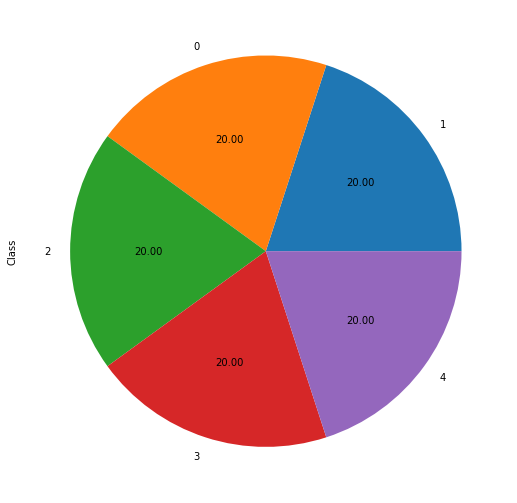

In [25]:
c_sm.value_counts().plot.pie(figsize = (9, 9), autopct="%.2f")

In [26]:
x_sm = d_sm.iloc[:, :-1].values
y_sm = d_sm.iloc[:, -1].values
print(x_sm.shape, y_sm.shape)
y_sm[0]

(475, 14) (475,)


12.3

In [27]:
x_scaled_sm = scaler.fit_transform(x_sm)
y_scaled_sm = scaler.fit_transform(y_sm.reshape(-1, 1))
y_scaled_sm[0]

array([0.25894737])

In [28]:
x_sm_train, x_sm_test, y_sm_train, y_sm_test = train_test_split(x_scaled_sm, y_scaled_sm, test_size=0.3, random_state=3)

In [29]:
model_sm = LinearRegression()
model_sm.fit(x_sm_train, y_sm_train)

LinearRegression()

In [30]:
pred_sm = model_sm.predict(x_sm_test)

In [31]:
rmse = math.sqrt(mean_squared_error(y_sm_test,pred_sm))
print('Root Means Squared Error SMOTE: ', rmse)

Root Means Squared Error SMOTE:  0.016163608860581342
